In [1]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical

/home/drdh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
operation=np.load("../data/generate_data/operation")

In [3]:
SEQLEN=10
STEP=1

input_operation=[]
label_operation=[]
for i in range(0,len(operation)-SEQLEN,STEP):
    input_operation.append(operation[i:i+SEQLEN])
    label_operation.append(operation[i+SEQLEN])
    

In [8]:
OPERATION_TYPE=2
X=np.zeros((len(input_operation),SEQLEN,OPERATION_TYPE),dtype=np.bool)
y=np.zeros((len(input_operation),OPERATION_TYPE),dtype=np.bool)
for i,input_op in enumerate(input_operation):
    for j,op in enumerate(input_op):
        X[i,j,op]=1
    y[i,label_operation[i]]=1

In [9]:
HIDDEN_SIZE=32
BATCH_SIZE=32
NUM_ITERATION=25
NUM_EPOCHS_PER_ITERATION=1
NUM_PREDS_PER_EPOCHS=10

model=Sequential()
model.add(SimpleRNN(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,OPERATION_TYPE),unroll=True))
model.add(Dense(OPERATION_TYPE))
model.add(Activation("softmax"))

model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

In [10]:
plot_model(model,to_file="../img/operation_SimpleRNN_model.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1120      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 1,186
Trainable params: 1,186
Non-trainable params: 0
_________________________________________________________________


In [11]:
X_val=np.zeros((2,SEQLEN,OPERATION_TYPE))
y_val=np.zeros((2,OPERATION_TYPE))
for i in range(2):
    for j in range(SEQLEN):
        X_val[i,j,i]=1
    y_val[i,i]=1

history=model.fit(X,y,batch_size=BATCH_SIZE,epochs=5,validation_data=(X_val,y_val))

Train on 1773 samples, validate on 2 samples
Epoch 1/5
1773/1773 [==============================] - 0s 208us/step - loss: 0.0938 - acc: 0.9814 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 2/5
1773/1773 [==============================] - 0s 83us/step - loss: 0.0244 - acc: 0.9949 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 3/5
1773/1773 [==============================] - 0s 107us/step - loss: 0.0180 - acc: 0.9966 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 4/5
1773/1773 [==============================] - 0s 99us/step - loss: 0.0163 - acc: 0.9966 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 5/5
1773/1773 [==============================] - 0s 84us/step - loss: 0.0150 - acc: 0.9972 - val_loss: 0.0031 - val_acc: 1.0000


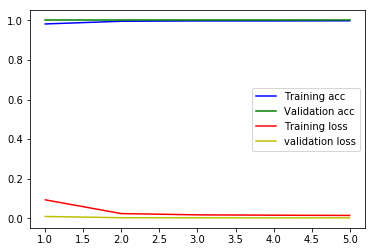

In [13]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label="Training acc")
plt.plot(epochs,val_acc,'g',label="Validation acc")
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/operation_SimpleRNN.png")
#plt.show()

In [14]:
model.save("../model/operation_SimpleRNN.h5")
model_r=load_model("../model/operation_SimpleRNN.h5")

In [17]:
X_test=np.zeros((2,1,SEQLEN,OPERATION_TYPE))
for i in range(2):
    for j in range(SEQLEN):
        X_test[i,0,j,i]=1

ypred=[]
for i in range(2):
    pred=model_r.predict(X_test[i],verbose=0)[0]
    ypred.append(np.argmax(pred))
ypred

[0, 1]

In [20]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [23]:
predict.network([10,11,12,3],36,1,[1,4],34,1,4,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 0,
 [0, 0, 1, 0, 0],
 0,
 1,
 0,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 1)